In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
57,40,M,HIGH,HIGH,27.826,drugY
168,51,F,LOW,NORMAL,23.003,drugY
49,28,F,LOW,HIGH,19.796,drugY
199,40,F,LOW,NORMAL,11.349,drugX
108,72,M,HIGH,NORMAL,9.677,drugB
177,25,M,NORMAL,HIGH,19.011,drugY
37,39,M,LOW,NORMAL,13.938,drugX
56,65,M,HIGH,NORMAL,11.340,drugB
159,34,F,LOW,NORMAL,12.923,drugX
98,20,M,HIGH,NORMAL,35.639,drugY


In [6]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

In [7]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
30,18,0,2,1,8.750,drugX
192,72,1,1,0,16.310,drugY
141,64,0,1,1,25.741,drugY
6,49,0,2,0,16.275,drugY
18,23,1,1,0,7.298,drugC
107,42,1,1,0,20.013,drugY
44,50,0,2,1,12.295,drugX
143,74,1,0,1,15.436,drugY
23,48,0,1,0,15.036,drugY
183,36,0,0,1,15.490,drugY


In [8]:
X = df.drop('Drug', axis=1).values
Y = df['Drug'].values

In [9]:
Y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
X

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043],
       [22.   ,  0.   ,  2.   ,  0.   ,  8.607],
       [49.   ,  0.   ,  2.   ,  0.   , 16.275],
       [41.   ,  1.   ,  1.   ,  0.   , 11.037],
       [60.   ,  1.   ,  2.   ,  0.   , 15.171],
       [43.   ,  1.   ,  1.   ,  1.   , 19.368],
       [47.   ,  0.   ,  1.   ,  0.   , 11.767],
       [34.   ,  0.   ,  0.   ,  1.   , 19.199],
       [43.   ,  1.   ,  1.   ,  0.   , 15.376],
       [74.   ,  0.   ,  1.   ,  0.   , 20.942],
       [50.   ,  0.   ,  2.   ,  0.   , 12.703],
       [16.   ,  0.   ,  0.   ,  1.   , 15.516],
       [69.   ,  1.   ,  1.   ,  1.   , 11.455],
       [43.   ,  1.   ,  0.   ,  0.   , 13.972],
       [23.   ,  1.   ,  1.   ,  0.   ,  7.298],
       [32.   ,  0.   ,  0.   ,  1.   , 25.974],
       [57.   ,  1. 

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=20)

In [13]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred = tree_model.predict(X_test)

In [15]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.94      0.97        17
       drugY       0.96      1.00      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [16]:
print(metrics.accuracy_score(Y_test,y_pred))

0.9833333333333333


Text(0.5, 23.52222222222222, 'Predicted')

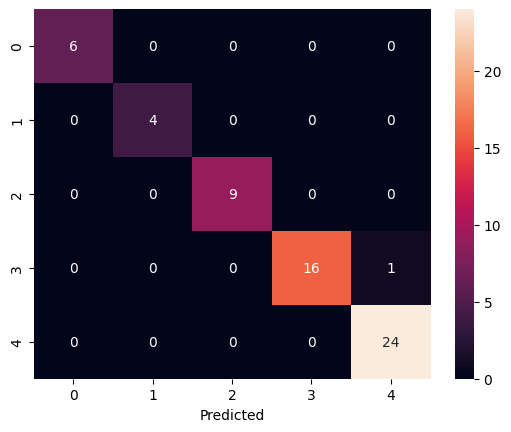

In [17]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')

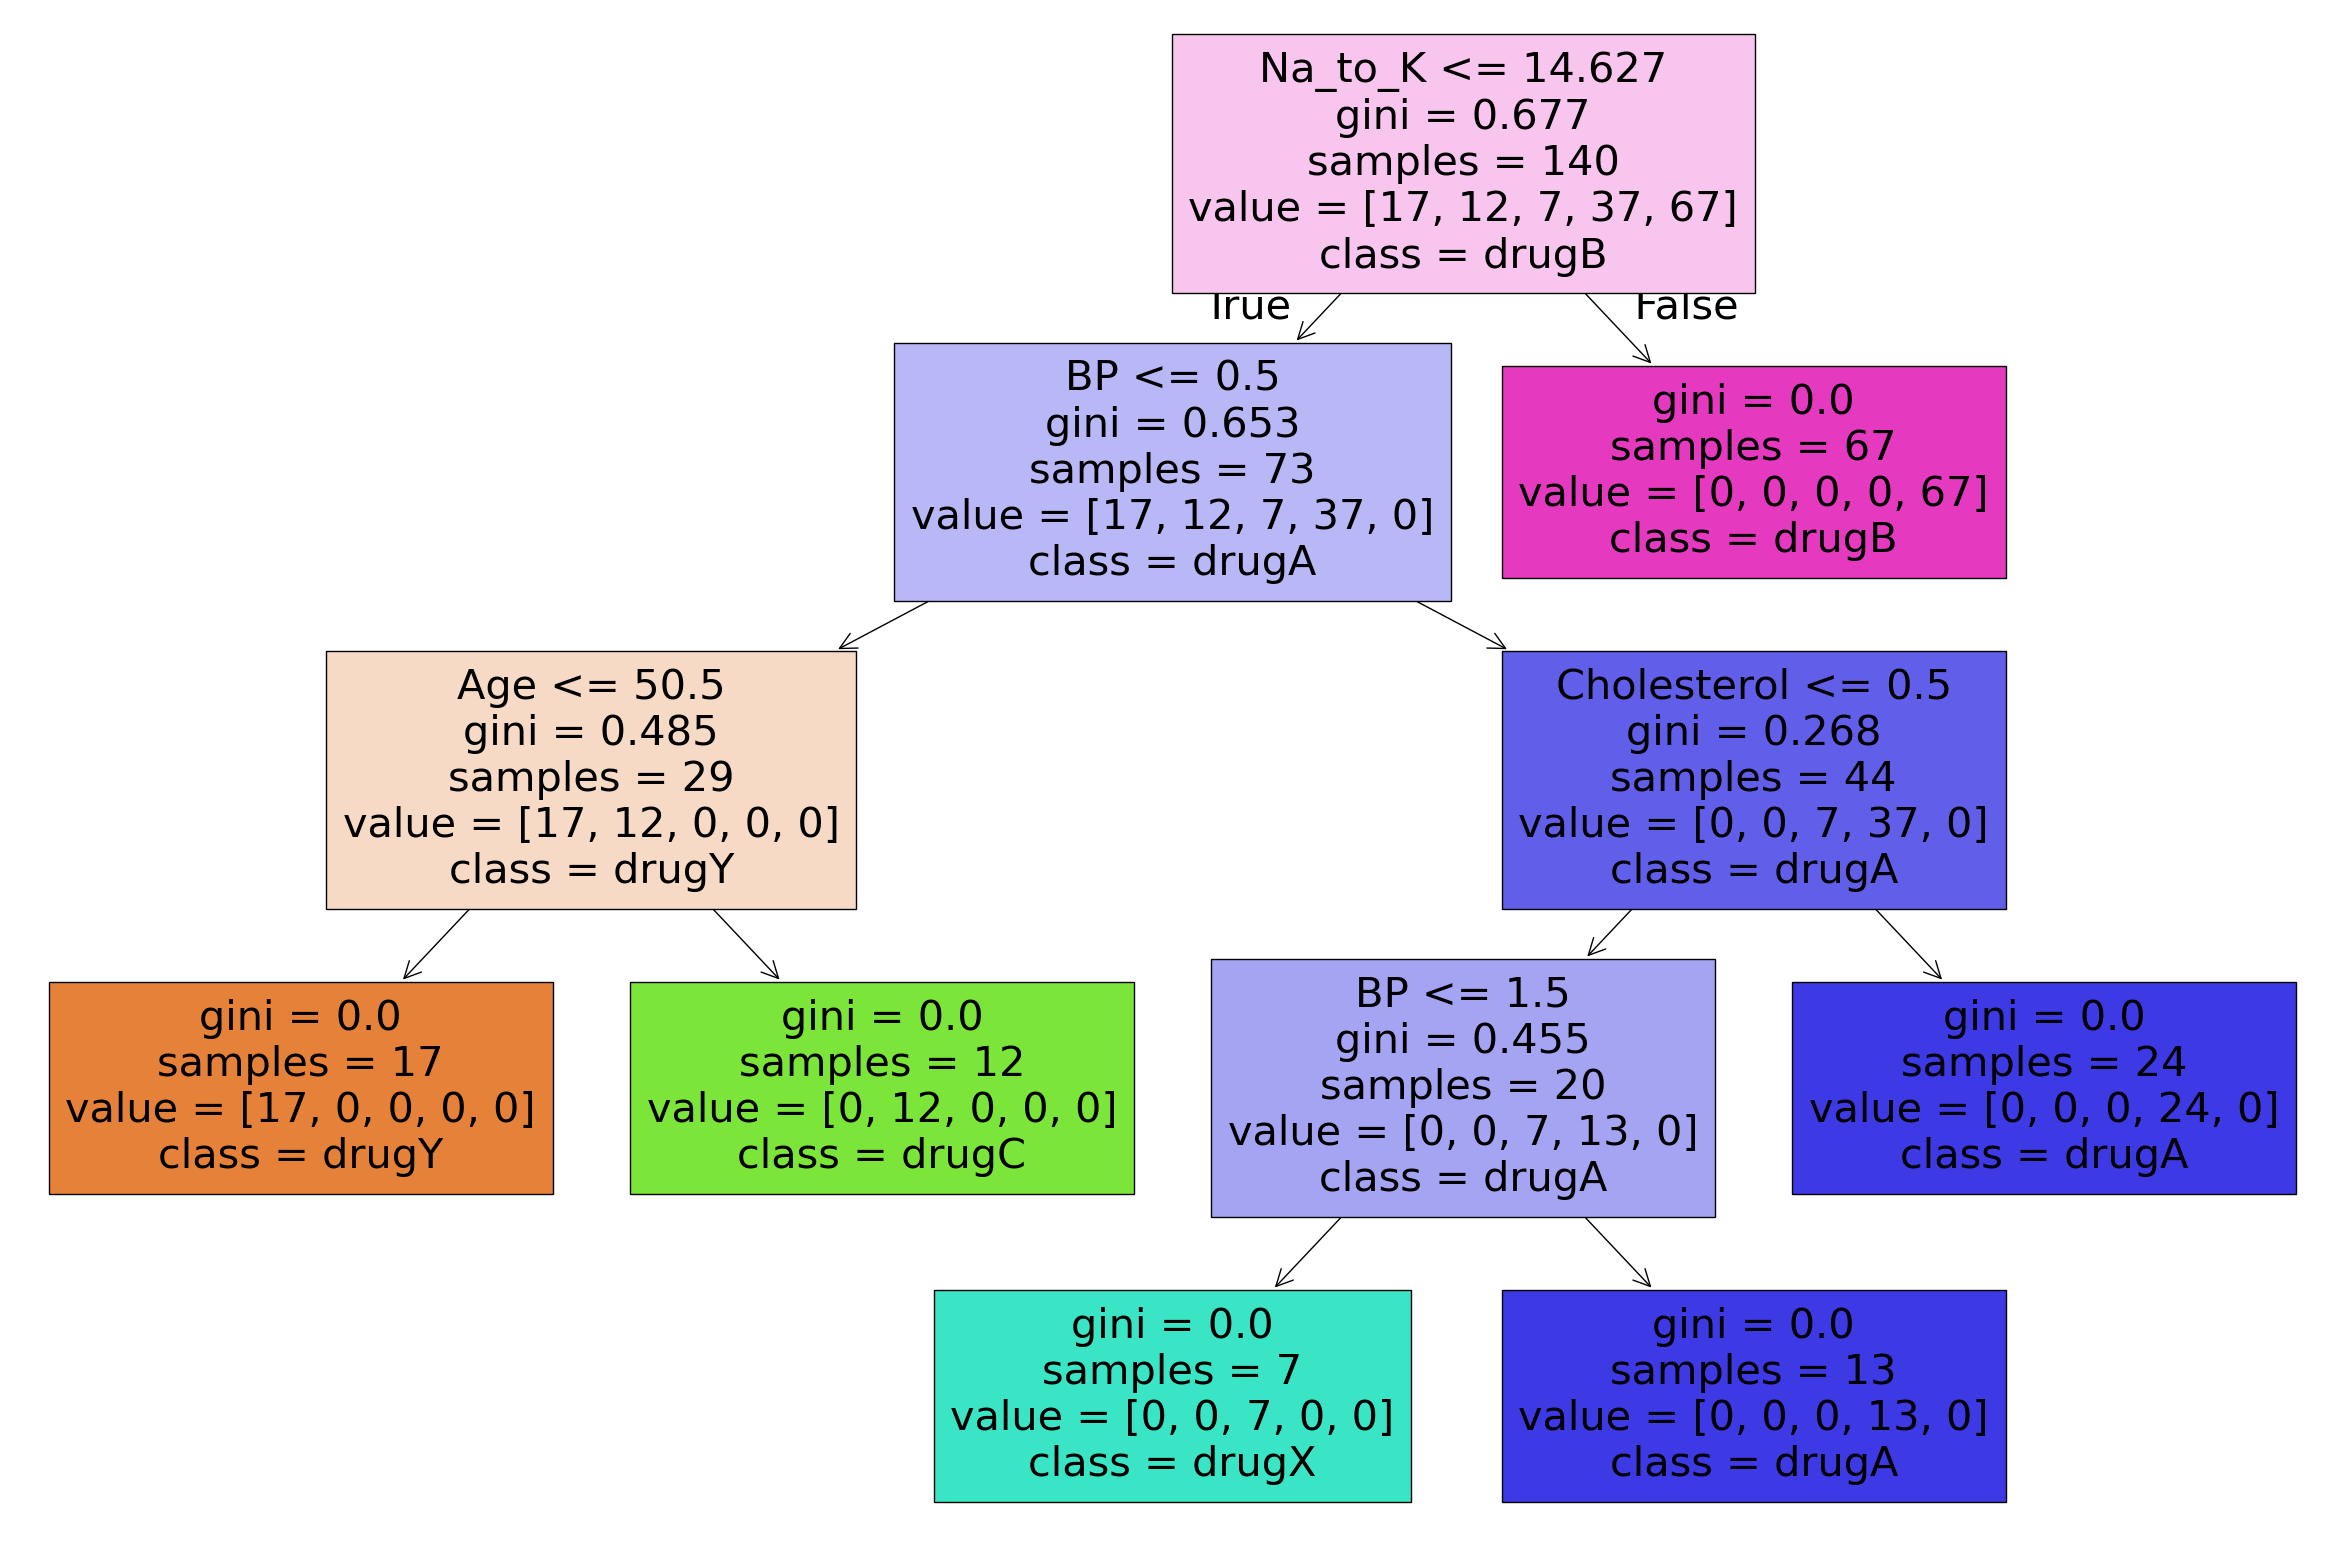

In [18]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [19]:
import numpy as np
import pandas as pd

In [20]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"

In [21]:
df = pd.read_csv(url)

In [22]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
5,22,F,NORMAL,HIGH,8.607,drugX
21,63,M,NORMAL,HIGH,25.917,drugY
58,60,M,NORMAL,NORMAL,10.091,drugX
9,43,M,LOW,NORMAL,19.368,drugY
45,66,F,NORMAL,NORMAL,8.107,drugX
168,51,F,LOW,NORMAL,23.003,drugY
195,56,F,LOW,HIGH,11.567,drugC
40,73,F,NORMAL,HIGH,19.221,drugY
198,23,M,NORMAL,NORMAL,14.020,drugX
176,48,M,HIGH,NORMAL,10.446,drugA


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [25]:
X = df.drop('Drug', axis=1).values
Y = df['Drug'].values

In [26]:
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [27]:
Y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [29]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = tree_model.predict(X_test)

In [31]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [32]:
print(metrics.accuracy_score(Y_test,y_pred))

0.95


In [33]:
correct = sum(Y_test == y_pred)
incorrect = sum(Y_test != y_pred)

In [34]:
print(correct)

76


In [35]:
incorrect

np.int64(4)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

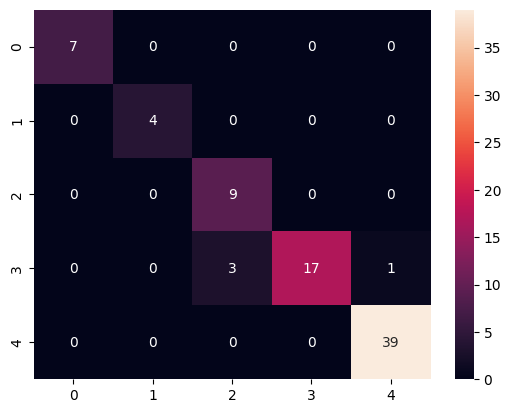

In [37]:
sns.heatmap(metrics.confusion_matrix(Y_test,y_pred),annot=True)
plt.show()

In [38]:
metrics.confusion_matrix(Y_test,y_pred)

array([[ 7,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  3, 17,  1],
       [ 0,  0,  0,  0, 39]])

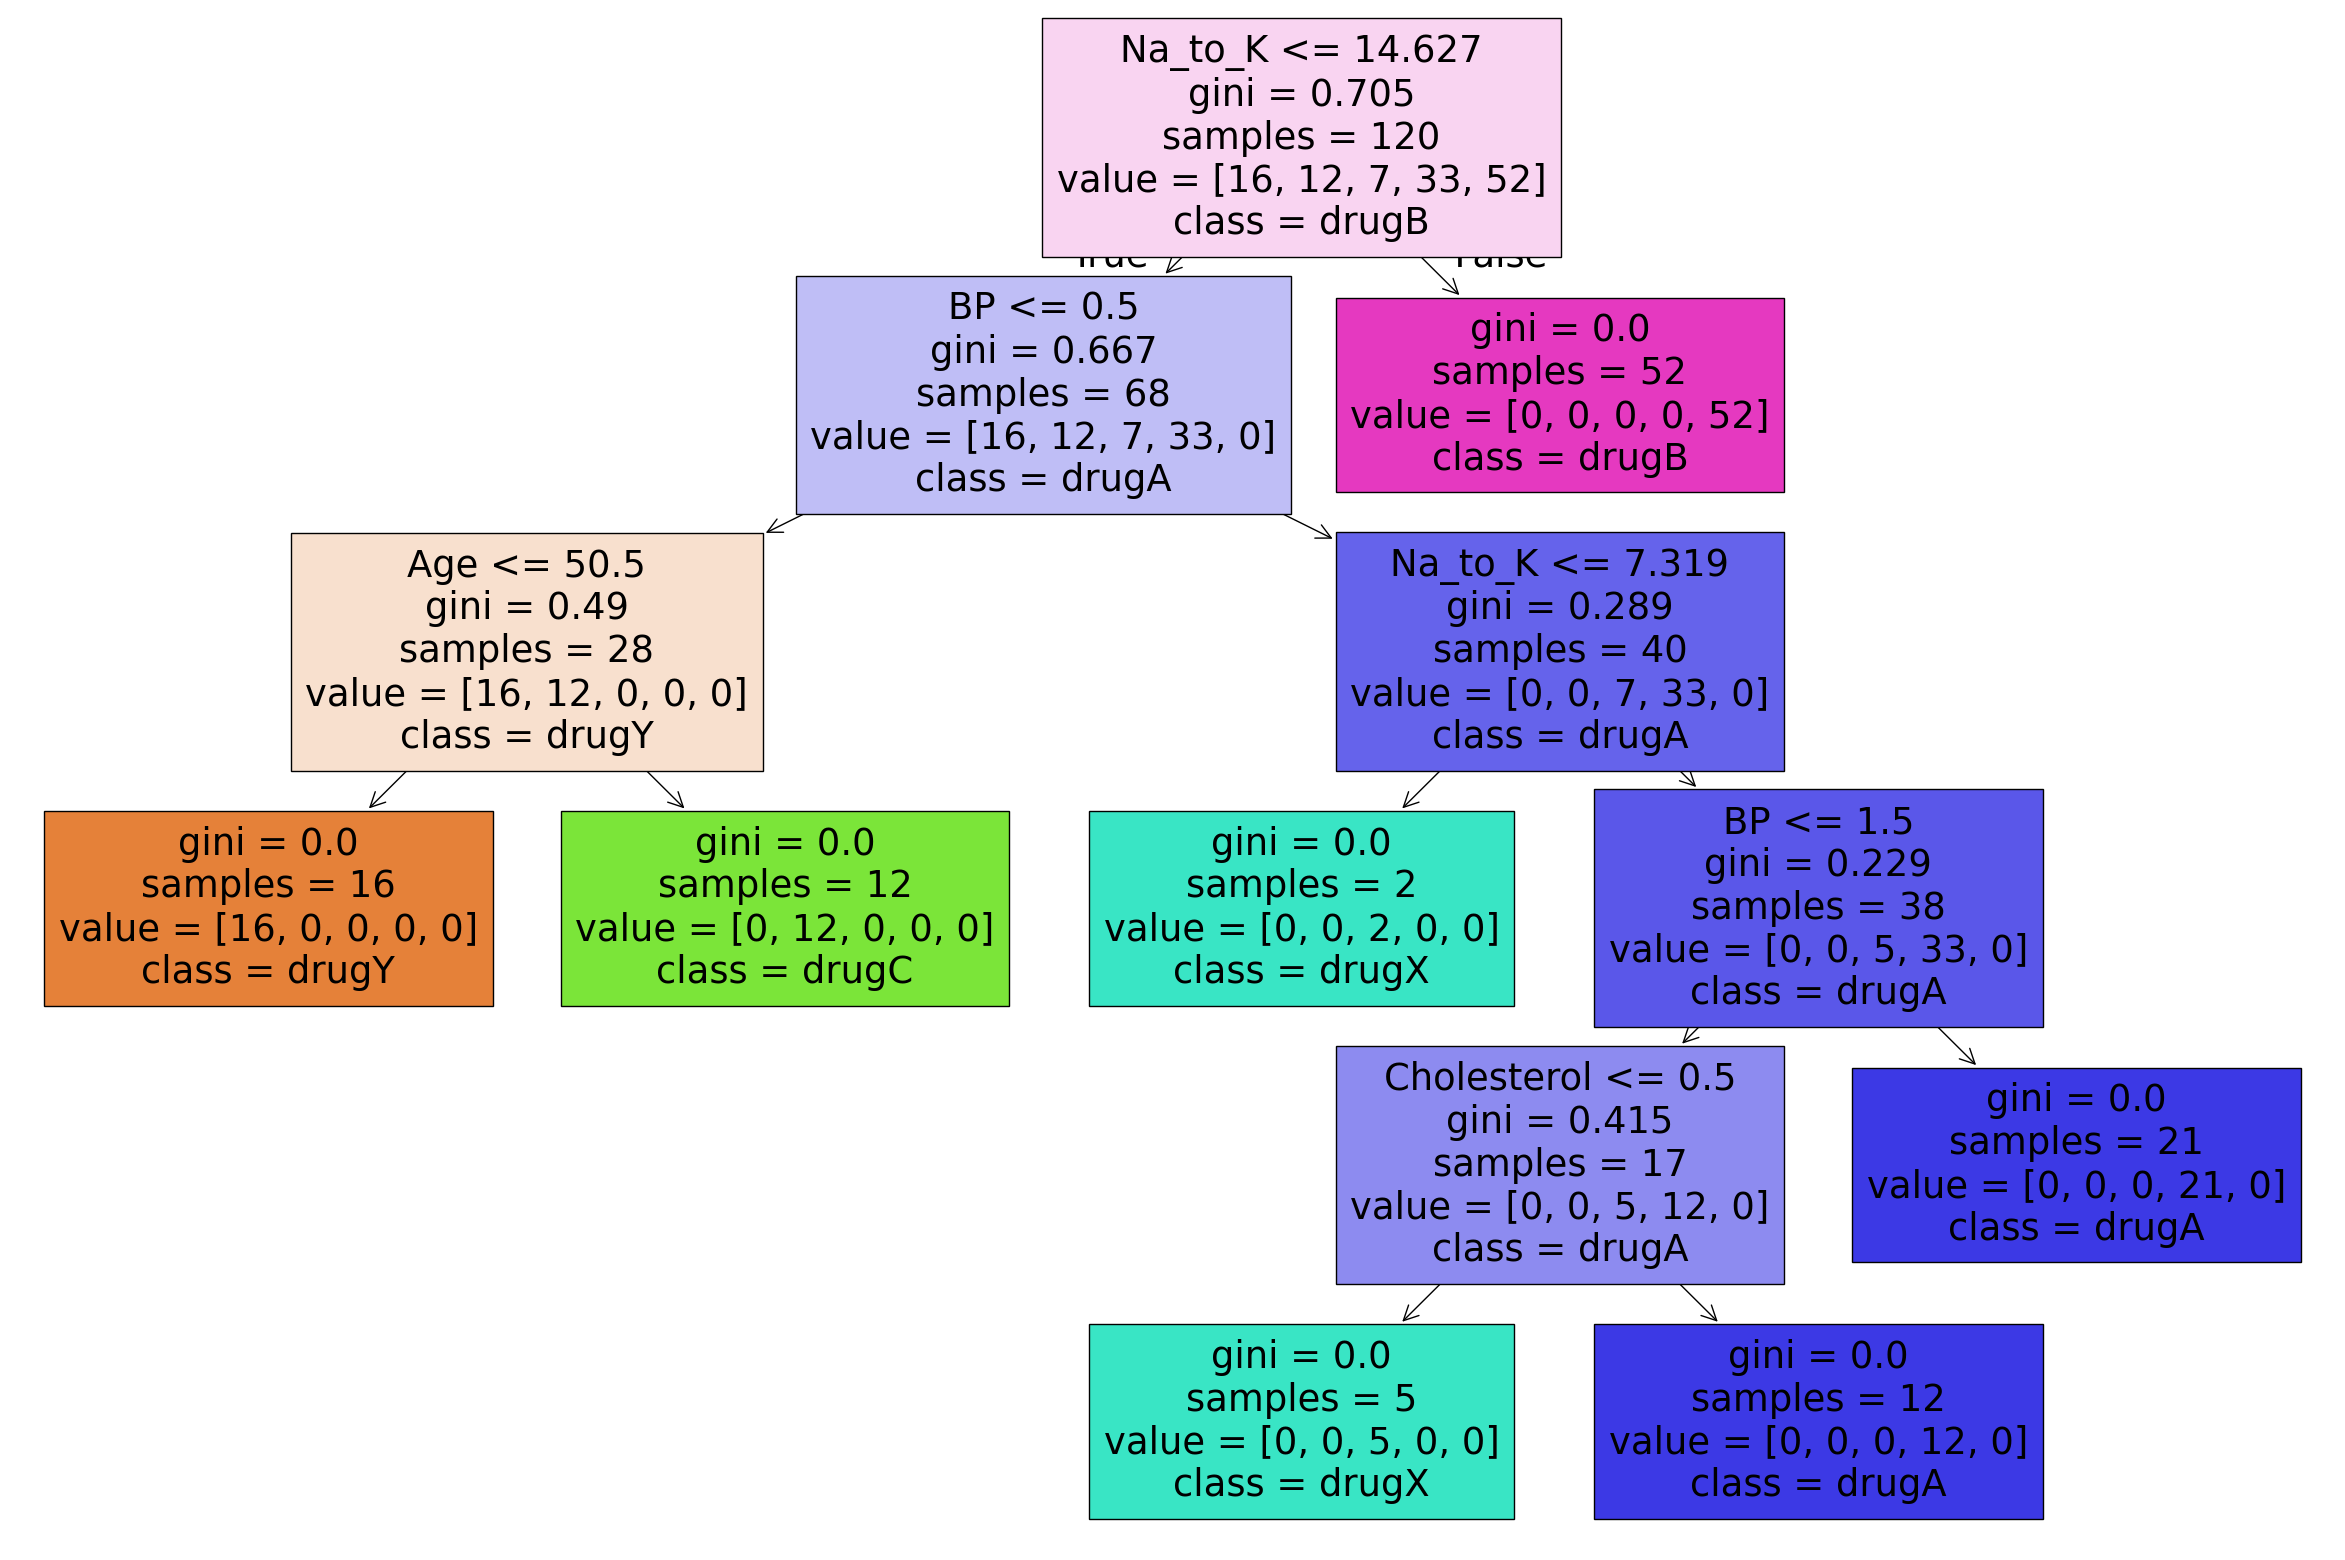

In [39]:
cols = df.drop('Drug',axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTree:  0.8375


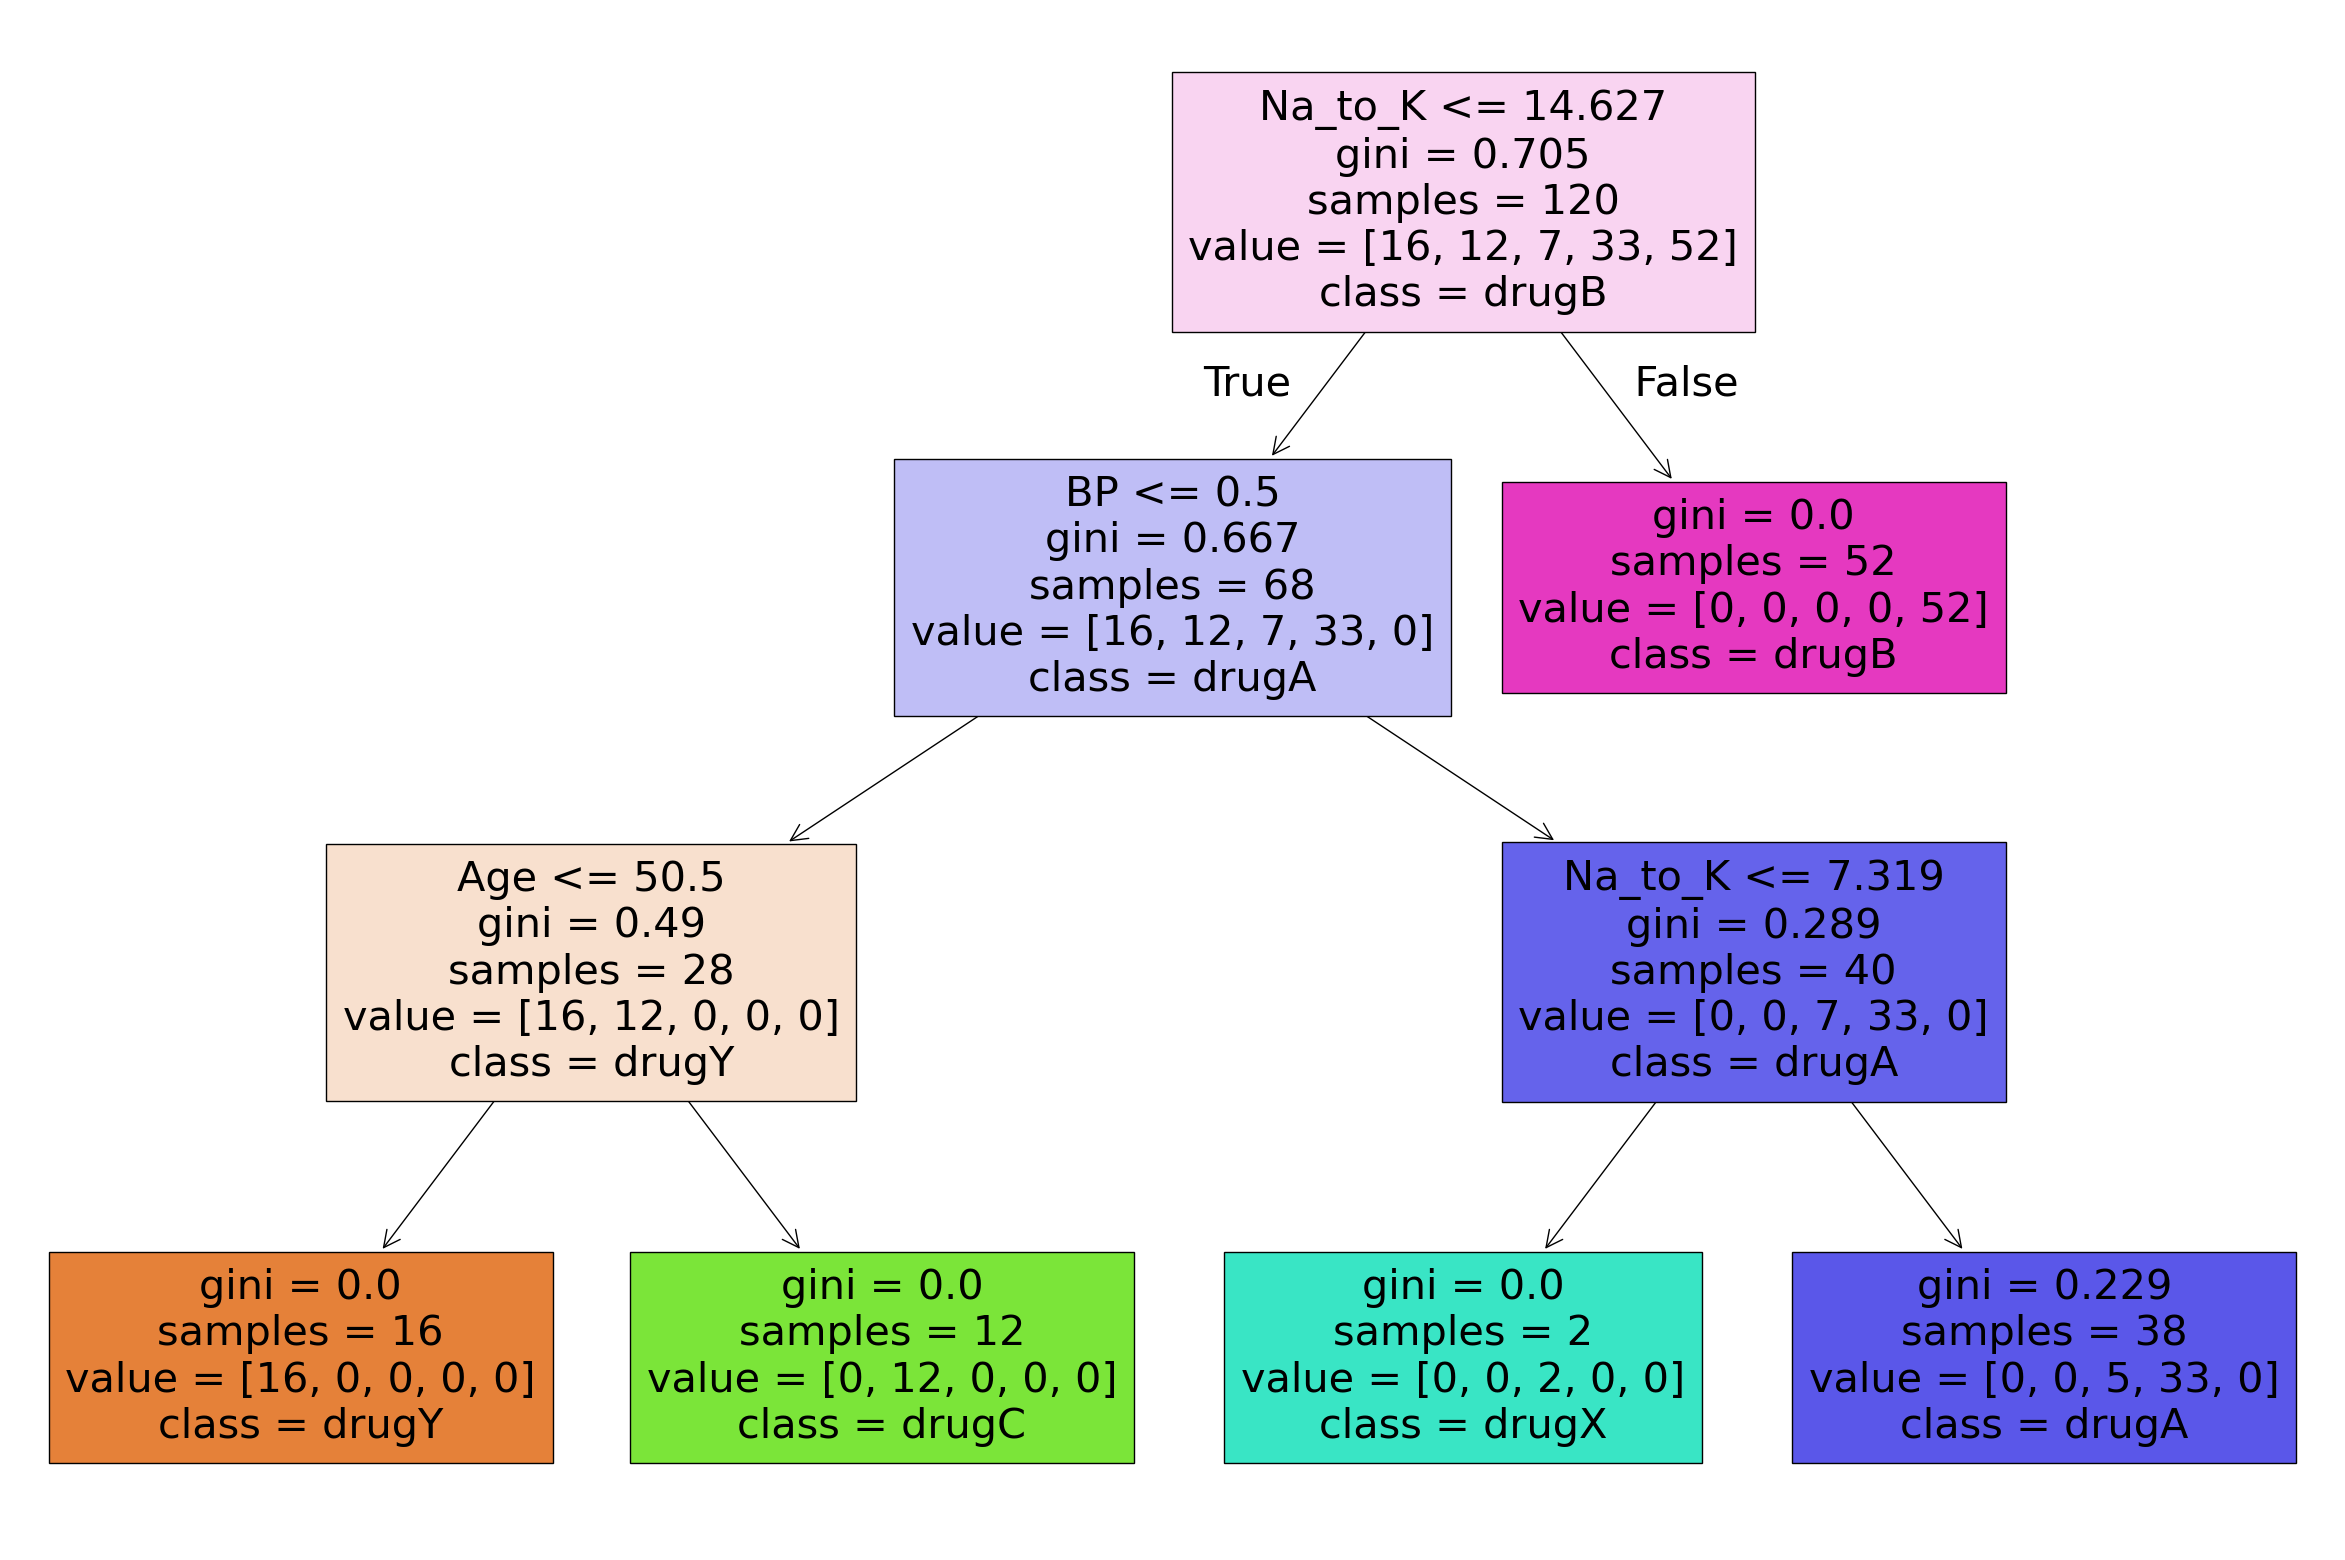

In [40]:
tree_model = tree.DecisionTreeClassifier(min_impurity_decrease=0.02)
tree_model.fit(X_train,Y_train)
y_pred = tree_model.predict(X_test)
print("DecisionTree: ", metrics.accuracy_score(Y_test,y_pred))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTree:  0.8375


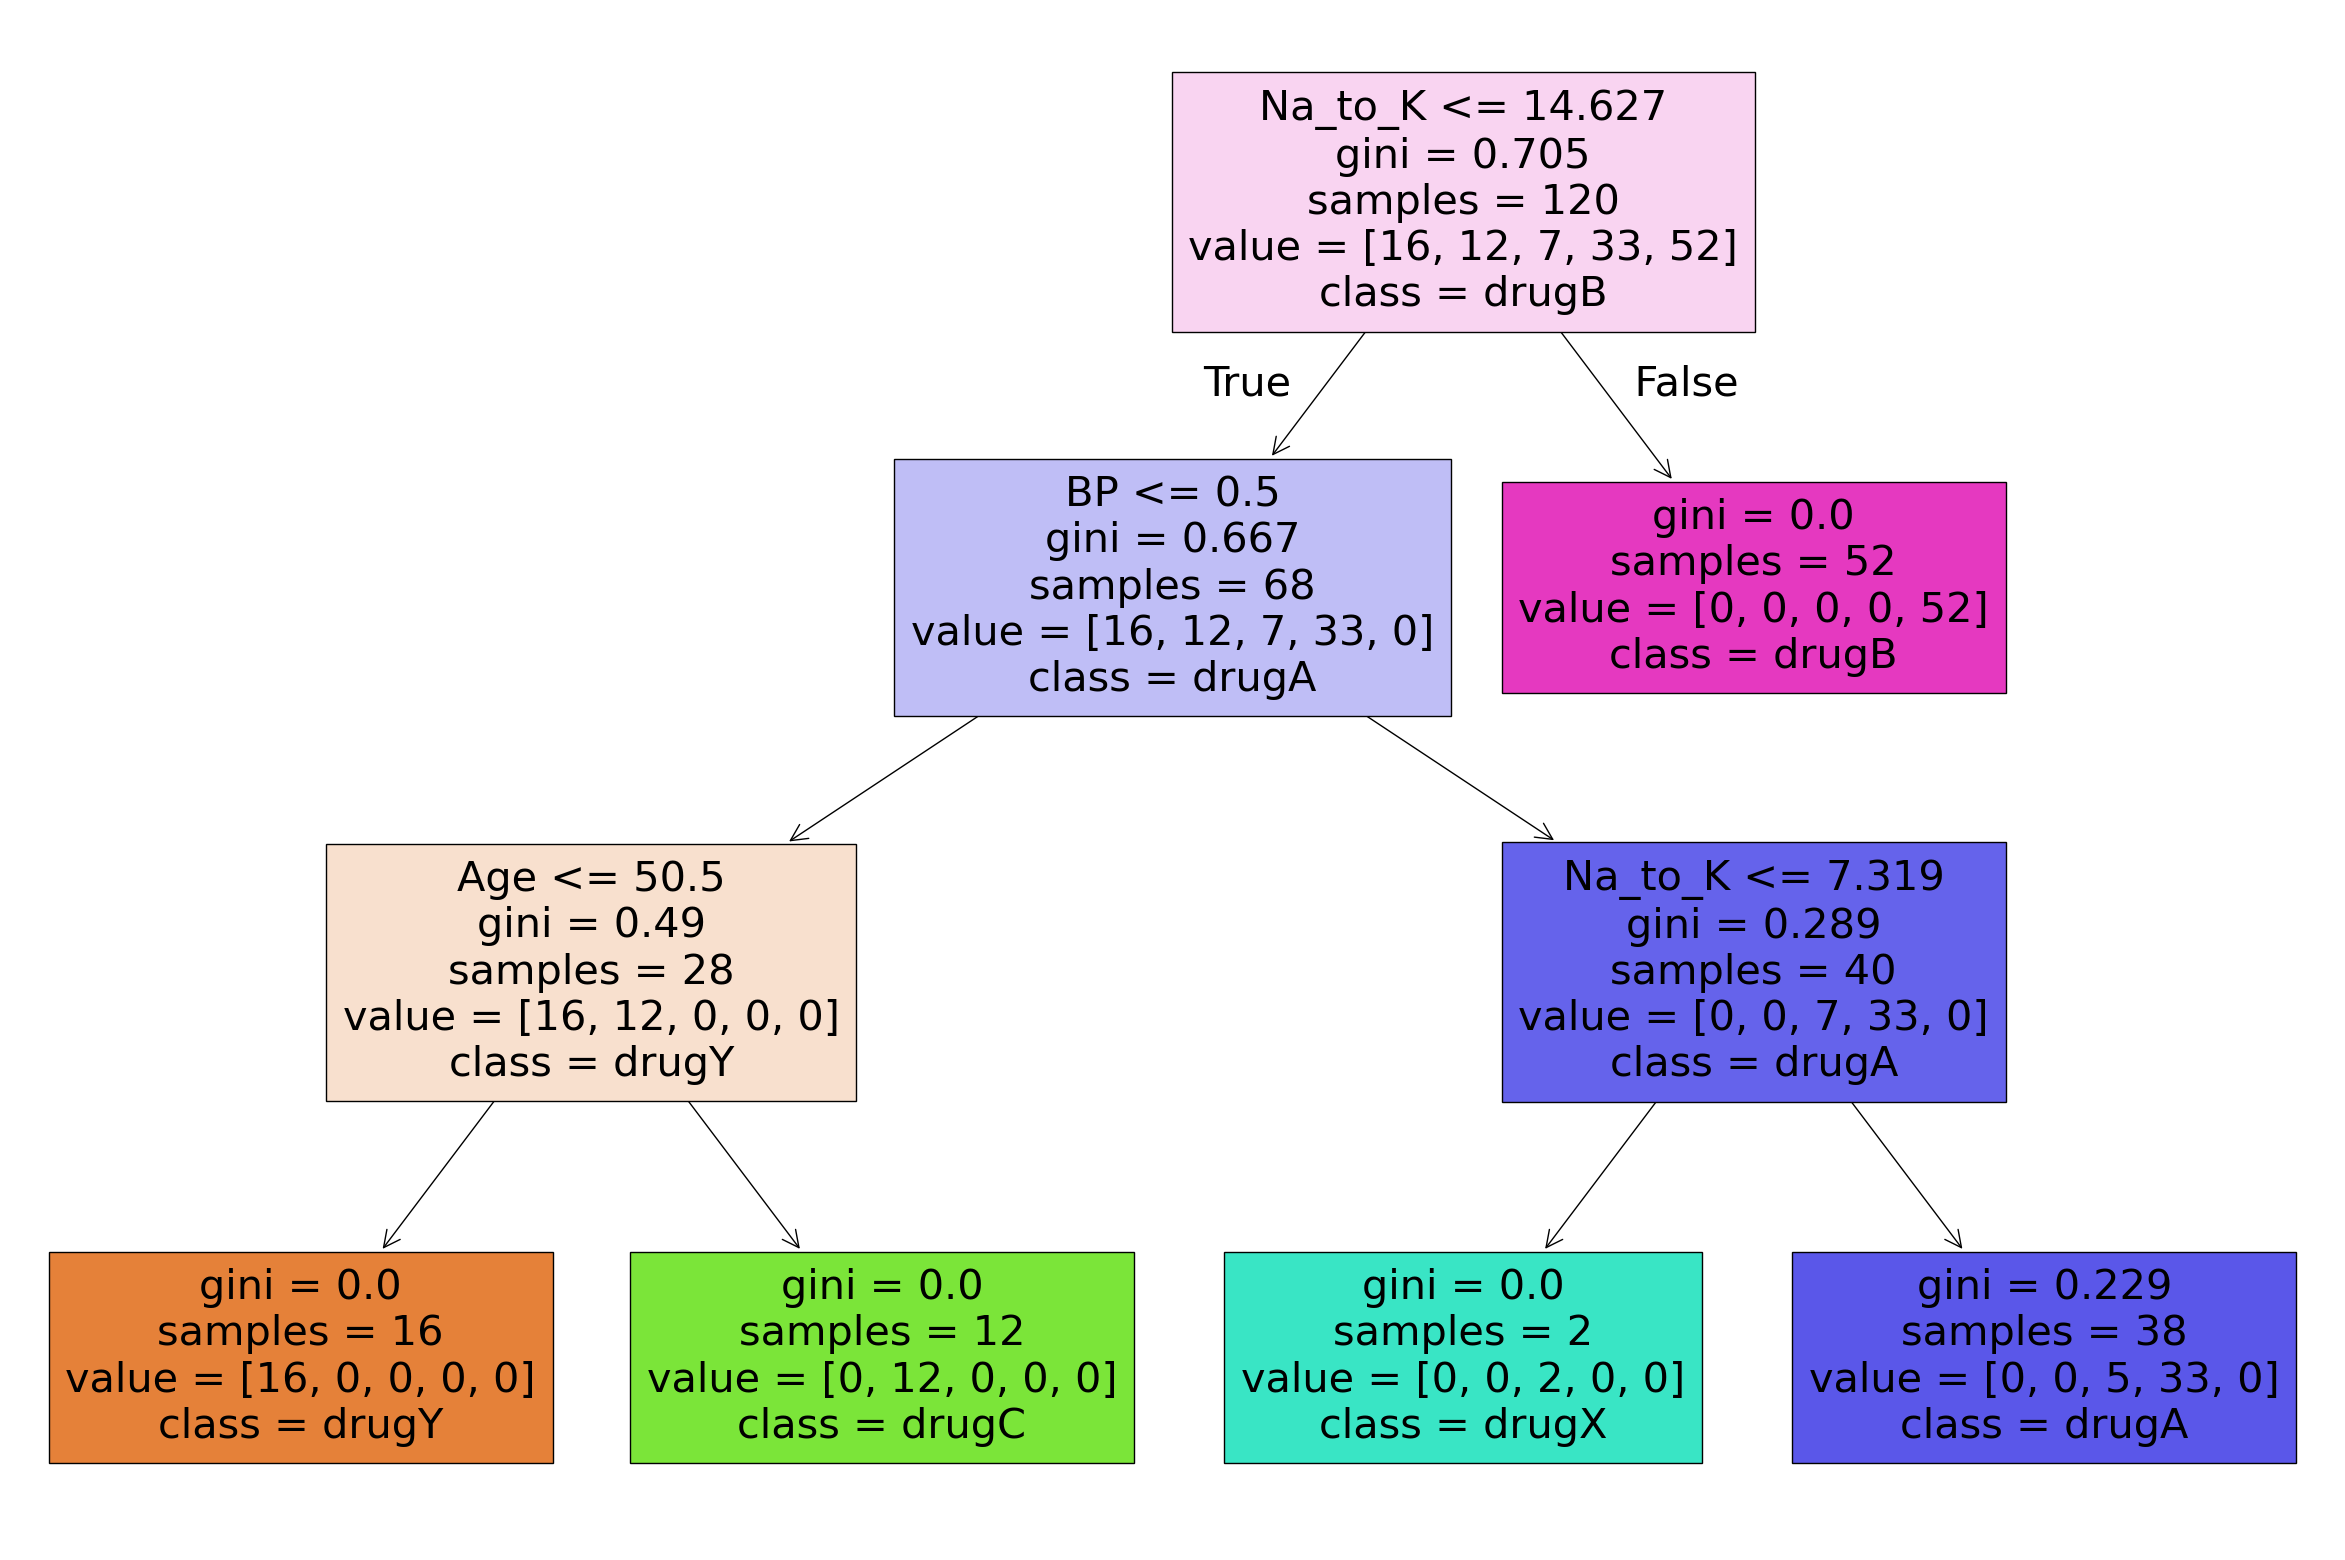

In [41]:
tree_model = tree.DecisionTreeClassifier(min_impurity_decrease=0.0,max_depth=3)
tree_model.fit(X_train,Y_train)
y_pred = tree_model.predict(X_test)
print("DecisionTree: ", metrics.accuracy_score(Y_test,y_pred))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTree:  0.875


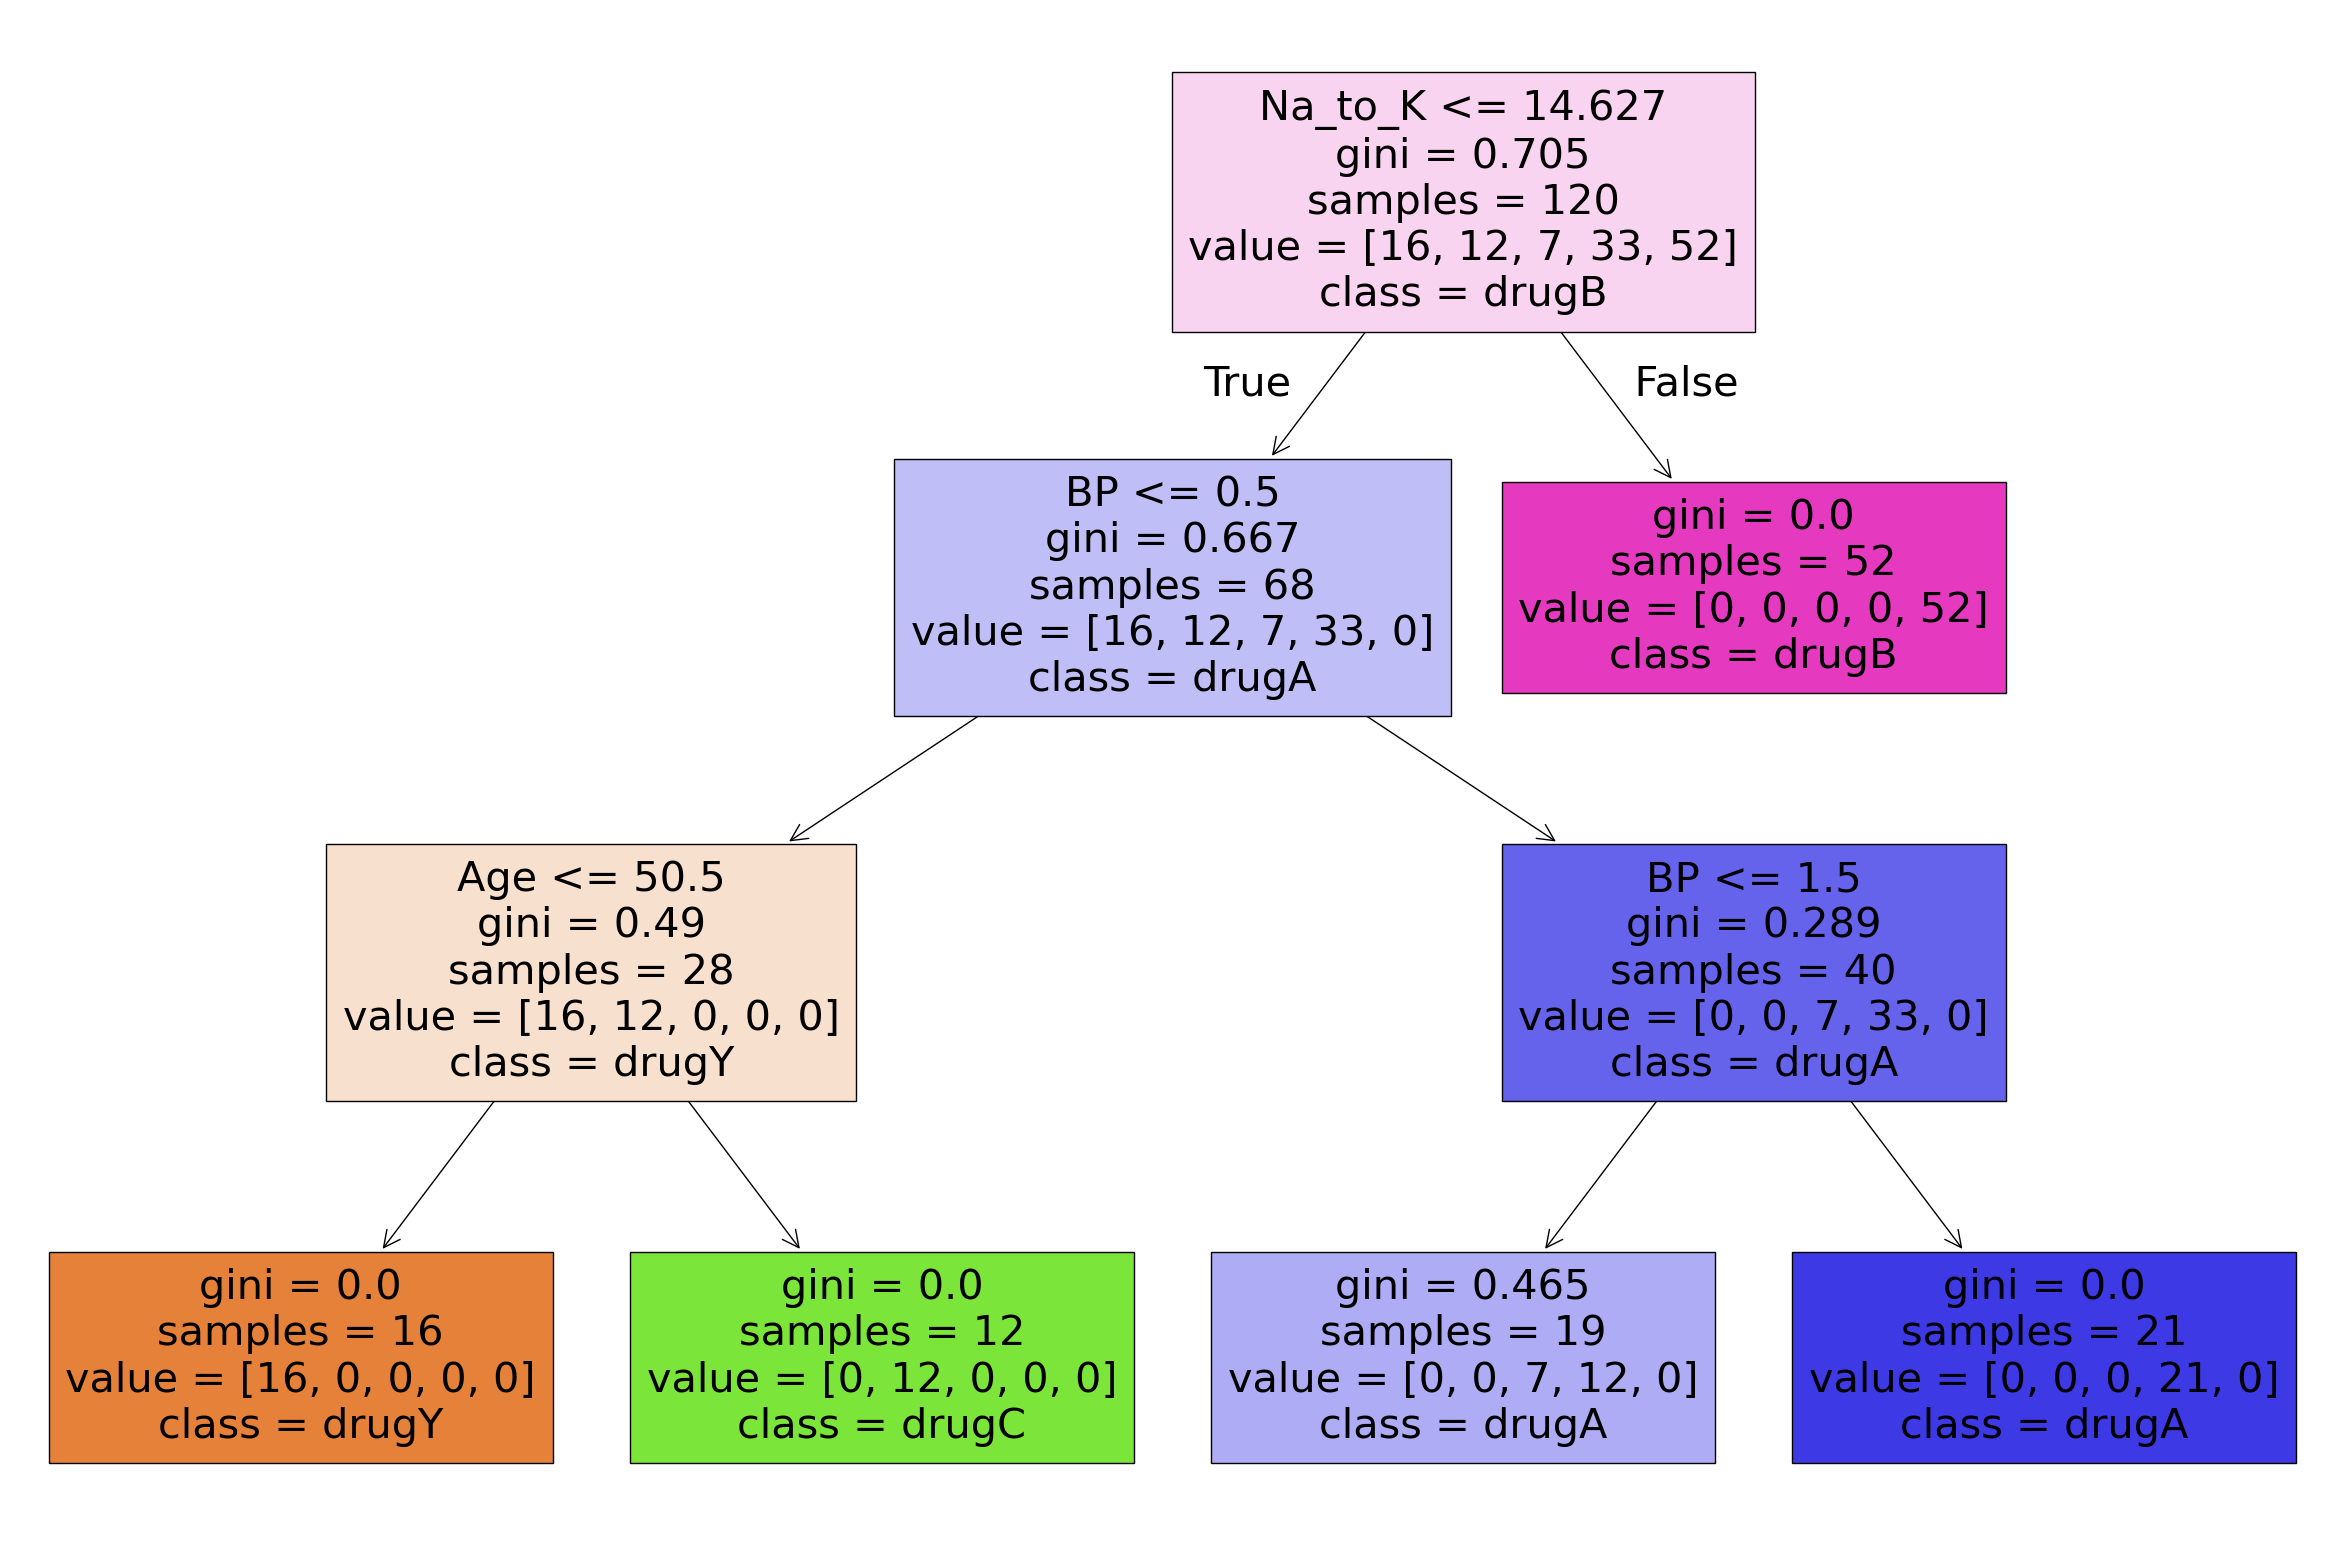

In [42]:
tree_model = tree.DecisionTreeClassifier(min_samples_leaf=3,max_depth=3)
tree_model.fit(X_train,Y_train)
y_pred = tree_model.predict(X_test)
print("DecisionTree: ", metrics.accuracy_score(Y_test,y_pred))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20)

rf_model.fit(X_train,Y_train)
y_pred = rf_model.predict(X_test)

print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.89      0.94         9
       drugX       0.95      1.00      0.98        21
       drugY       1.00      1.00      1.00        39

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80



In [46]:
print(metrics.accuracy_score(Y_test,y_pred))

0.9875
